## K-Means Clustering

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [5]:
X.shape

(1000, 2)

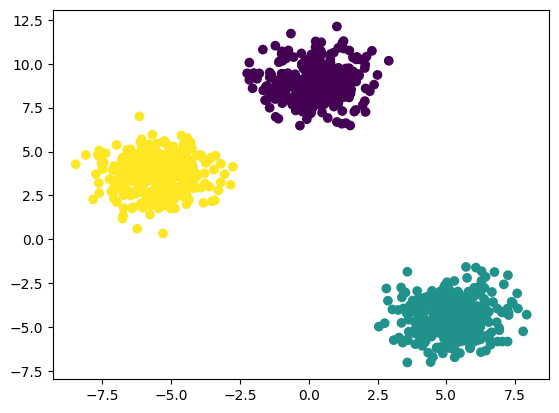

In [8]:
plt.scatter(X[:,0], X[:,1])         #extract the first and second feature (or column) of X, representing the x and y 
                                    #coordinates of the points.

In [9]:
# plt.scatter(X[:,0], X[:,1], c=y)  -> This should be the final output but for unsuprvised 
#                                       clustering problem the y labels won't be provided

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 45
) 

In [11]:
from sklearn.cluster import KMeans

In [13]:
#Manual Process
#Elbow method to select number of clusters

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)                    #inertia actually calculates the sum of distances of all the points within a
                                                    #cluster from the centroid of that cluster

In [14]:
wcss            #list of wcss values for k = 1, 2, and so on

[34745.60548746875,
 7901.31681260519,
 1295.3628859342803,
 1126.3169936764634,
 1016.7512875232842,
 844.7961678709008,
 739.3480959771606,
 658.005749533249,
 566.4949915767697,
 512.4507212890867]

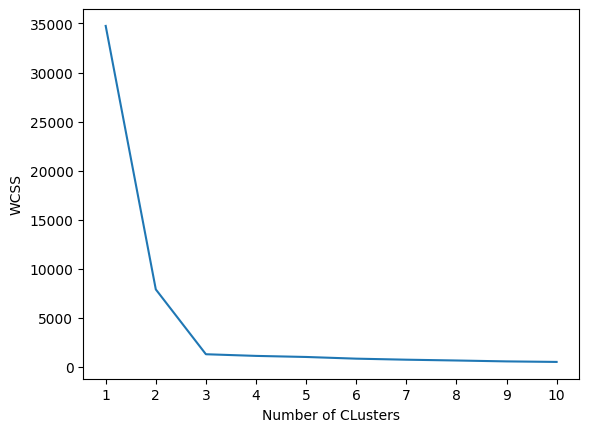

In [15]:
#Plot Elbow Curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of CLusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [20]:
y_labels = kmeans.fit_predict(X_train)

In [21]:
y_labels                #Cluster labels

array([0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2,
       2, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2,
       2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1,
       1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2,
       1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2,
       2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0,

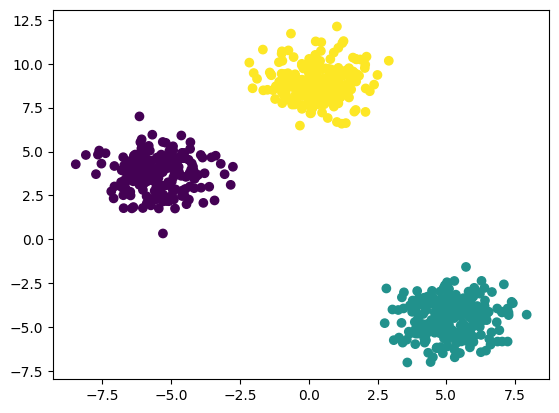

In [22]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_labels)

In [23]:
y_test_label = kmeans.predict(X_test)

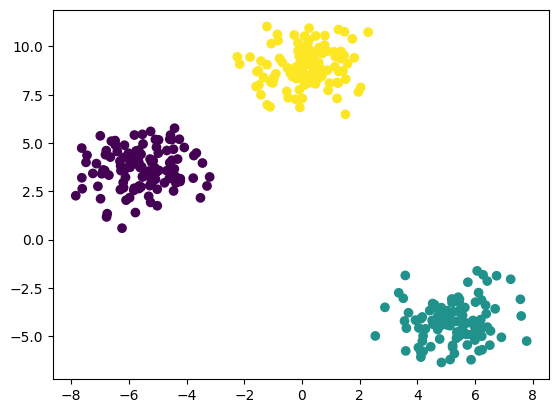

In [24]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test_label)

### Knee Locator

In [25]:
!pip install kneed 

In [26]:
from kneed import KneeLocator           #gives value of num of clusters automatically

In [28]:
k1=KneeLocator(range(1,11), wcss, curve = 'convex', direction='decreasing')
k1.elbow

3

### Silhouette Score

In [30]:
#Performance matrix
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coeff = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coeff.append(score)

In [33]:
silhouette_coeff            #value close to 1 -> GOOD Model, close to -1 -> BAD Model

[0.7281140639099495,
 0.8093283643275953,
 0.6277439336717969,
 0.48917466113917274,
 0.323393841458967,
 0.3382934826632778,
 0.33784480730775124,
 0.35312241173480996,
 0.3528138617042116]

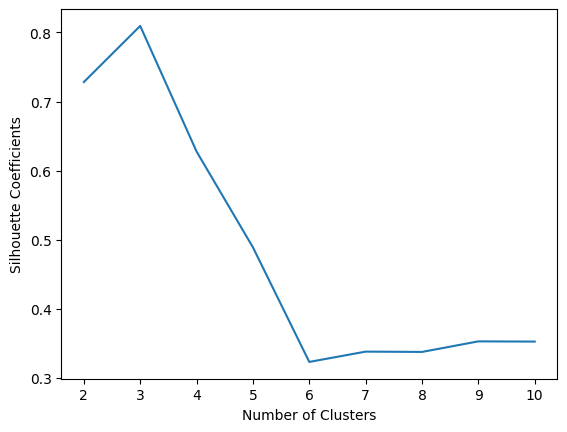

In [34]:
plt.plot(range(2,11), silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

## Hierarchical Clustering

In [35]:
import pandas as pd
import numpy as np